## Data Cleaning

In [4]:
import numpy as np  # Import NumPy for numerical computations
import pandas as pd  # Import pandas for data handling
data = pd.read_csv("sample_dataset.csv")  # Load CSV file into a DataFrame

In [6]:
df=pd.DataFrame(data) # Convert the data into a pandas DataFrame called 'df'

In [8]:
df.head()# Display the first 5 rows of the DataFrame 'df' to get a quick look at the data

,ID,Age,Salary,Department,Experience_Years
0,1,25.0,40000.0,HR,2.0
1,2,30.0,42000.0,IT,5.0
2,3,29.0,39000.0,Finance,3.0
3,4,22.0,45000.0,IT,7.0
4,5,45.0,1000000.0,HR,10.0


In [12]:
df.info()  # Display a concise summary of the DataFrame 'df', including column names, data types, and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                20 non-null     int64  
 1   Age               18 non-null     float64
 2   Salary            18 non-null     float64
 3   Department        18 non-null     object 
 4   Experience_Years  17 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 932.0+ bytes


In [14]:
df.shape

(20, 5)

In [16]:
df.isnull().any()  # Check each column in 'df' to see if it contains any missing (null) values

ID                  False
Age                  True
Salary               True
Department           True
Experience_Years     True
dtype: bool

In [18]:
df.isnull().sum()  # Count the total number of missing (null) values in each column of 'df'

ID                  0
Age                 2
Salary              2
Department          2
Experience_Years    3
dtype: int64

In [20]:
df.duplicated()  # Check for duplicate rows in 'df'; returns True for each duplicate row

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
dtype: bool

In [26]:
df.describe()  # Generate summary statistics for numerical columns in 'df' 

,ID,Age,Salary,Experience_Years
count,20.00000,18.000000,18.000000,17.000000
mean,10.50000,37.444444,94916.666667,4.882353
std,5.91608,24.258952,225989.865077,3.276476
min,1.00000,17.000000,30000.000000,0.000000
25%,5.75000,22.750000,39125.000000,2.000000
50%,10.50000,29.500000,41500.000000,5.000000
75%,15.25000,43.750000,46500.000000,7.000000
max,20.00000,120.000000,1000000.000000,11.000000


In [30]:
# First, try dropping rows with null values
df1 = df.dropna()  # Drop rows with missing values
df1.shape  # Show shape of df1

# Later, we will try filling the missing values instead of dropping

(12, 5)

In [32]:
df1

,ID,Age,Salary,Department,Experience_Years
0,1,25.0,40000.0,HR,2.0
1,2,30.0,42000.0,IT,5.0
2,3,29.0,39000.0,Finance,3.0
3,4,22.0,45000.0,IT,7.0
4,5,45.0,1000000.0,HR,10.0
6,7,120.0,48000.0,IT,8.0
7,8,33.0,49000.0,Finance,6.0
10,11,19.0,41000.0,IT,1.0
11,12,18.0,40000.0,Sales,2.0
13,14,35.0,60000.0,HR,11.0


In [34]:
# Clean column names first
df.columns = df.columns.str.replace('\xa0', ' ').str.strip()
#Filling the missing values 
# Fill missing Age with Mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Fill missing Salary with Median
df['Salary'] = df['Salary'].fillna(df['Salary'].median())

# Fill missing Department with Mode
df['Department'] = df['Department'].fillna(df['Department'].mode()[0])

# Fill missing Experience with Mean
df['Experience_Years'] = df['Experience_Years'].fillna(df['Experience_Years'].mean())


In [36]:
df

,ID,Age,Salary,Department,Experience_Years
0,1,25.000000,40000.0,HR,2.000000
1,2,30.000000,42000.0,IT,5.000000
2,3,29.000000,39000.0,Finance,3.000000
3,4,22.000000,45000.0,IT,7.000000
4,5,45.000000,1000000.0,HR,10.000000
5,6,55.000000,47000.0,Sales,4.882353
6,7,120.000000,48000.0,IT,8.000000
7,8,33.000000,49000.0,Finance,6.000000
8,9,28.000000,41500.0,Finance,4.000000
9,10,40.000000,43000.0,Finance,3.000000


In [38]:
# Calculate IQR to detect outliers in the data
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper limits
low = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR

df = df[(df['Salary'] >= low) & (df['Salary'] <= high)]

In [40]:
df

,ID,Age,Salary,Department,Experience_Years
0,1,25.000000,40000.0,HR,2.000000
1,2,30.000000,42000.0,IT,5.000000
2,3,29.000000,39000.0,Finance,3.000000
3,4,22.000000,45000.0,IT,7.000000
5,6,55.000000,47000.0,Sales,4.882353
6,7,120.000000,48000.0,IT,8.000000
7,8,33.000000,49000.0,Finance,6.000000
8,9,28.000000,41500.0,Finance,4.000000
9,10,40.000000,43000.0,Finance,3.000000
10,11,19.000000,41000.0,IT,1.000000


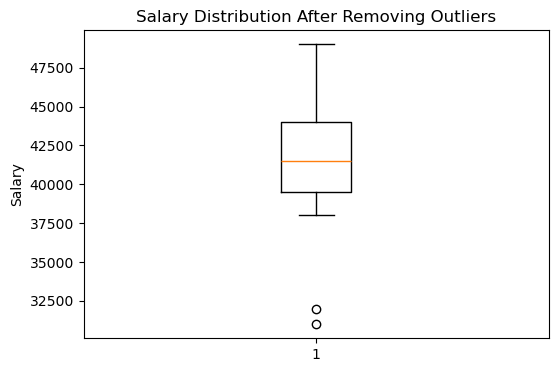

In [42]:
# A boxplot is used to visualize the distribution of data and detect outliers
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.boxplot(df['Salary'])
plt.title("Salary Distribution After Removing Outliers")
plt.ylabel("Salary")
plt.show()


## Data Pre Processing

In [50]:
import numpy as np
import pandas as pd

np.random.seed(0)
data={
    'Age':np.random.randint(20,80,size=500),
    'Income':np.random.randint(20000, 100000, size=500)
}
df=pd.DataFrame(data)

In [52]:
df.head()

,Age,Income
0,64,35352
1,67,84022
2,73,34297
3,20,25896
4,23,32003


### Standardisation

In [62]:
from sklearn.preprocessing import StandardScaler  # Import StandardScaler to standardize/normalize data

s = StandardScaler()  # Create a StandardScaler object
df_standardized = s.fit_transform(df)  # Standardize the DataFrame 'df' (mean=0, std=1)
df_standardized = pd.DataFrame(df_standardized, columns=df.columns)  # Convert back from array to DataFrame
print("\nStandardised Dataset")  
print(df_standardized.head())  


Standardised Dataset
        Age    Income
0  0.855237 -1.153645
1  1.027133  1.028898
2  1.370924 -1.200955
3 -1.665897 -1.577687
4 -1.494001 -1.303827


### Normalisation

In [71]:
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler for normalization

s = MinMaxScaler()  # Create a MinMaxScaler object
df_normalized = s.fit_transform(df)  # Normalize 'df' values to range 0-1
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)  # Convert back from array to DataFrame
print("\nNormalized Dataset")
print(df_normalized.head()) 


Normalized Dataset
        Age    Income
0  0.745763  0.191838
1  0.796610  0.803724
2  0.898305  0.178575
3  0.000000  0.072956
4  0.050847  0.149734


### Logarithm Transformation

In [78]:
# Log transformation is used to reduce skewness and handle large values
df2 = df.copy()  # Create a copy of 'df' to preserve the original data
df2['Income'] = np.log(df2['Income'])  # Apply log transformation to the 'Income' column
print("\nTransformed Dataset:")
print(df2.head())  


Transformed Dataset:
   Age     Income
0   64  10.473110
1   67  11.338834
2   73  10.442813
3   20  10.161844
4   23  10.373585


### Discretize the 'Age' feature into bins

In [91]:
# Discretization converts continuous data into categorical bins

# Define bins and labels for discretizing age
age_bins = [0, 30, 60, 150]  
age_labels = ['Young', 'Adult', 'Elderly']  
# Create a copy of the DataFrame to avoid changing the original
df_age = df.copy()  
# Discretize the 'Age' column into categories and create a new column 'Age_Group'
df_age['Age_Group'] = pd.cut(df_age['Age'], bins=age_bins, labels=age_labels)  
print("\nDiscretized Dataset:")
print(df_age.head())  # Show first 5 rows of the discretized dataset


Discretized Dataset:
   Age  Income Age_Group
0   64   35352   Elderly
1   67   84022   Elderly
2   73   34297   Elderly
3   20   25896     Young
4   23   32003     Young
